# Multi-media Information Processing (EECE 7217) 

## Assignment 2

University of Memphis, Spring 2023

Bereket Kebede, Gradaute Student, EECE, U00827234 <br>
For this assignment, we are using a dataset from the UCI machine learning repository. <br>

Instructor: Prof. Michael Bartz


Perform both PCA and LDA on the original Wheat Seeds data and suggest any feature transformations that are appropriate.  Justify your recommendation.

Add these new features to your already existing GitHub repo for the wheat seeds work previously submitted.

In [1]:
####################################################
# import necessary libraries 

import pandas as pd
import os
import json
import time
import pickle
import requests
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

In [3]:
####################################################
# retreive data

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
def fetch_data(fname='seeds_dataset.txt'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [4]:
####################################################
# define the features

FEATURES  = [
    "area",
    "perimeter",
    "compactness",
    "length",
    "width",
    "asymmetry",
    "groove"
]

df = pd.read_csv(DATA, sep='\s+',names=FEATURES + ['target'])
display(df)

,area,perimeter,compactness,length,width,asymmetry,groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
X = df.loc[:, FEATURES]
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [46 52 49]
Labels counts in y_test: [24 18 21]


## Applying PCA


Principal component analysis (PCA) is an unsupervised linear transformation technique that is prominently used for dimensionality reduction to identify data patterns based on the correlation between features. PCA requires that the 
data is standardised, hence we will use standard scaler from sklearn


In [6]:
%%time

pca = PCA(n_components=2)
#X_r = pca.fit(X).transform(X)
scaler = StandardScaler()

X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

X_train_newer = scaler.fit_transform(X_train_new)
X_test_newer = scaler.transform(X_test_new)

Wall time: 21.9 ms


In [11]:
print("--before Application of PCA")
print (X_train.shape)
print (X_test.shape)
print("--After Application of PCA")
print (X_train_newer.shape)
print (X_test_newer.shape)

--before Application of PCA
(147, 7)
(63, 7)
--After Application of PCA
(147, 2)
(63, 2)


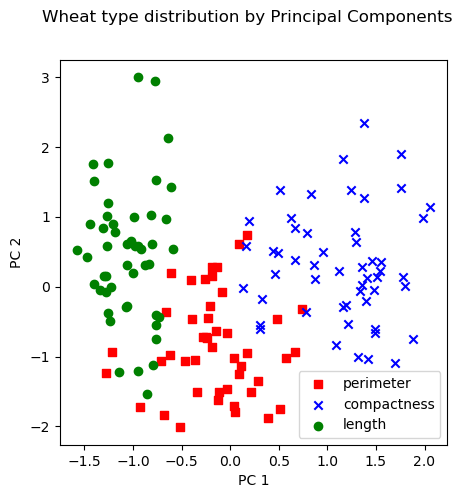

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
 
colors = ['r','b', 'g','y','k','b','r']
markers = ['s', 'x', 'o','>','<','1','2']

my_list = [1,2,3]
 
for l, c, m in zip(my_list, colors, markers):
    ax.scatter(X_train_newer[y_train==l, 0], X_train_newer[y_train==l, 1],  c=c, label=FEATURES[l], marker=m)
 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend(loc='lower right')
 
fig.suptitle("Wheat type distribution by Principal Components");

From the plot above, since the data is more distibuted along the PC 1 with high variance, choose PC 1 using a linear classifier

## Applying LDA

In [29]:
LDA_model = LinearDiscriminantAnalysis()
#LDA_model.fit(X_train, y_train)

X_lda = LDA_model.fit_transform(X, y)

In [30]:
# We can access the following property to obtain the variance explained by each component.

LDA_model.explained_variance_ratio_

array([0.68141241, 0.31858759])

Text(0.5, 1.0, 'Linear Discriminant Analysis')

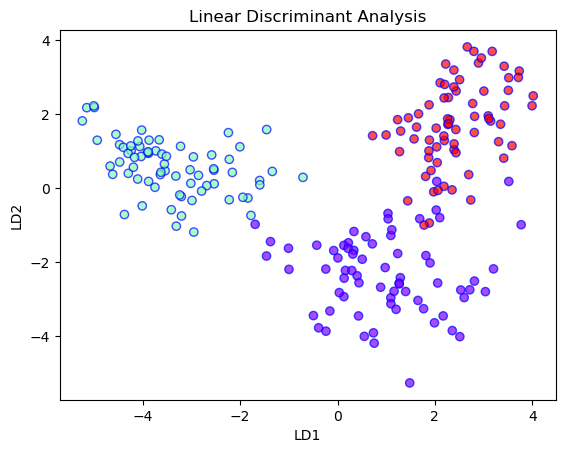

In [33]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

plt.title('Linear Discriminant Analysis')